<h3> 순환신경망(RNN, Recurrent Neural Network) </h3>
<p> 순환신경망은 순서가 있는 데이터를 입력으로 받아 같은 네트워크를 이용해 변화하는 입력에 대한 출력을 얻어내는 방식 <br> x1의 출력값이 다음입력값인 x2의 출력값에 전달되는 신경망 구조 </p>
<p style="color:blue"> 이미지 설명(Image Caption)생성, 감성분석(Sentiment Classification), 기계 번역(Machine Translation)으로 활용 가능 </p>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1600px-Recurrent_neural_network_unfold.svg.png" alt="RNN Image">

<h3> 주요 레이어 정리 </h3>
<ul> 
    <li> SimpleRNN Layer : 가장 간단한 형태의 RNN 레이어로 xi의 출력값이 xj의 출력값을 계산할때 입력값으로 들어감 타입스텝이 커질수록 학습 능력이 떨어진다는 단점 존재 </li>        
    <li> LSTM Layer : SimpleRNN의 단점인 Long-Term Dependency를 제거</li>
    <li> GRU Layer : LSTM 레이어와 비슷한 역할을 하나 구조가 더 간단함 </li>
    <li> Embedding Layer : </li>
</ul>

## 

<h2> 1. SimpleRNN Layer  </h2>
<ul>
    <li> 장점 : 개념이 간단하며 구현이 쉽다 </li>
    <li> 단점1 : 타임스텝이 길어질수록 장기의존성 문제가 발생해 학습 능력이 저하됨 </li>
    <li> 단점2 : 동일 가중치를 사용하므로 그레디언트 폭발이나 기울기 소실등의 문제가 발생함 </li>
    <li> 특징 : h_i = W*x_i + U*h_(i-1) </li>
    <li> Usage : tf.keras.layers.SimpleRNN(units, activation, return_sequences=True) </li>
</ul>
<img src="https://miro.medium.com/max/1400/1*HRuDxU1i4JNu-Ywt88LnaQ.png" alt="simplernn_image">

In [4]:
import numpy as np
import tensorflow as tf

x = list()
y = list()
for i in range(6) : 
    tmp = list(range(i, i+4))
    x.append(list(map(lambda c: [c/10], tmp)))
    y.append((i+4)/10)
    
X = np.array(x)
Y = np.array(y)

In [8]:
print(X[0], Y[0]) # X -> Y

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=(4,1)),
    tf.keras.layers.Dense(units=1)])

model.compile(optimizer="adam",
              loss = tf.keras.losses.mean_squared_error)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X, Y, epochs=100, verbose=0)
model.predict(X)

1/1 [==============================] - 0s 7ms/step


array([[0.37387505],
       [0.50792104],
       [0.6247747 ],
       [0.72259057],
       [0.80202585],
       [0.86526686]], dtype=float32)

## 

<h2> 2. LSTM(Long Short Term Memory) Layers  </h2>
<ul>
    <li> 장점 : SimpleRNN의 장기의존성 문제를 제거할 수 있다 </li>
    <li> 단점1 : LSTM의 셀의 메모리 구조가 복잡하고 계산량이 많다 </li>
    <li> Usage : tf.keras.layers.LSTM(units, activation, return_sequences=True) </li>
</ul>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png" alt="lstm_image">

<h2> 3. GRU(Gated Recurrent Uint) Layer  </h2>
<ul>
    <li> 장점 : SimpleRNN의 장기의존성 문제를 제거할 수 있으며 LSTM 구조보다 간단하게 구현가능하다 </li>
    <li> 특징 : LSTM의 셀 상태 c를 따로 두지 않으며 h가 비슷한 역할을 수행한다 </li>
    <li> Usage : tf.keras.layers.GRU(units, activation, return_sequences=True) </li>
</ul>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/2880px-Gated_Recurrent_Unit%2C_base_type.svg.png" alt="gru_image">

# 

In [59]:
# SimpleRNN, LSTM, GRU 실습
# 곱셈 문제 : 100개의 실수중 2개의 실수를 뽑아 곱한 결과를 맞추는 문제
x = list()
y = list()
for i in range(3000) :
    tmp = np.random.rand(100)
    index = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[index] = 1
    x.append(np.array(list(zip(zeros, tmp))))
    y.append(np.prod(tmp[index]))

In [60]:
# SimpleRNN
model_simplernn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)])
# LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)])
# GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)])

model_simplernn.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mean_squared_error)
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mean_squared_error)
model_gru.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mean_squared_error)

model_simplernn.summary()
model_lstm.summary()
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 100, 30)           990       
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 30)           3960      
                                                                 
 lstm_3 (LSTM)               (

In [62]:
X = np.array(x)
Y = np.array(y)

history_simplernn = model_simplernn.fit(X, Y, epochs=100, validation_split=0.2)
history_lstm = model_lstm.fit(X, Y, epochs=100, validation_split=0.2)
history_gru = model_gru.fit(X, Y, epochs=100, validation_split=0.2)

Epoch 1/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0512 - val_loss: 0.0514
Epoch 2/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0492 - val_loss: 0.0510
Epoch 3/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0491 - val_loss: 0.0530
Epoch 4/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0502 - val_loss: 0.0544
Epoch 5/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0497 - val_loss: 0.0523
Epoch 6/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0522 - val_loss: 0.0512
Epoch 7/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0489 - val_loss: 0.0509
Epoch 8/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0488 - val_loss: 0.0515
Epoch 9/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0487 - val_loss: 0.0515
Epoch 10/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0492 - val_loss: 0.0511

75/75 [==============================] - 1s 10ms/step - loss: 0.0319 - val_loss: 0.0572
Epoch 83/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0320 - val_loss: 0.0580
Epoch 84/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0315 - val_loss: 0.0582
Epoch 85/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0313 - val_loss: 0.0575
Epoch 86/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0309 - val_loss: 0.0587
Epoch 87/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0319 - val_loss: 0.0569
Epoch 88/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0298 - val_loss: 0.0576
Epoch 89/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0295 - val_loss: 0.0606
Epoch 90/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0285 - val_loss: 0.0593
Epoch 91/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0291 - val_loss: 0.0580
Epo

Epoch 63/100
75/75 [==============================] - 1s 18ms/step - loss: 8.8702e-04 - val_loss: 0.0014
Epoch 64/100
75/75 [==============================] - 1s 19ms/step - loss: 8.2477e-04 - val_loss: 6.8059e-04
Epoch 65/100
75/75 [==============================] - 1s 18ms/step - loss: 8.0889e-04 - val_loss: 0.0016
Epoch 66/100
75/75 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 9.9223e-04
Epoch 67/100
75/75 [==============================] - 1s 18ms/step - loss: 7.7607e-04 - val_loss: 0.0010
Epoch 68/100
75/75 [==============================] - 1s 19ms/step - loss: 6.8065e-04 - val_loss: 6.2779e-04
Epoch 69/100
75/75 [==============================] - 1s 19ms/step - loss: 6.1115e-04 - val_loss: 5.8283e-04
Epoch 70/100
75/75 [==============================] - 1s 19ms/step - loss: 6.2292e-04 - val_loss: 6.2428e-04
Epoch 71/100
75/75 [==============================] - 1s 18ms/step - loss: 7.2461e-04 - val_loss: 4.4685e-04
Epoch 72/100
75/75 [===============

75/75 [==============================] - 1s 17ms/step - loss: 6.1517e-04 - val_loss: 4.9877e-04
Epoch 41/100
75/75 [==============================] - 1s 17ms/step - loss: 5.6914e-04 - val_loss: 4.9745e-04
Epoch 42/100
75/75 [==============================] - 1s 17ms/step - loss: 5.2775e-04 - val_loss: 4.9741e-04
Epoch 43/100
75/75 [==============================] - 1s 17ms/step - loss: 4.9720e-04 - val_loss: 4.5544e-04
Epoch 44/100
75/75 [==============================] - 1s 17ms/step - loss: 4.7833e-04 - val_loss: 5.3797e-04
Epoch 45/100
75/75 [==============================] - 1s 17ms/step - loss: 5.7178e-04 - val_loss: 4.3784e-04
Epoch 46/100
75/75 [==============================] - 1s 17ms/step - loss: 5.0219e-04 - val_loss: 3.9377e-04
Epoch 47/100
75/75 [==============================] - 1s 17ms/step - loss: 4.7955e-04 - val_loss: 4.4150e-04
Epoch 48/100
75/75 [==============================] - 1s 17ms/step - loss: 4.2762e-04 - val_loss: 4.3198e-04
Epoch 49/100
75/75 [============

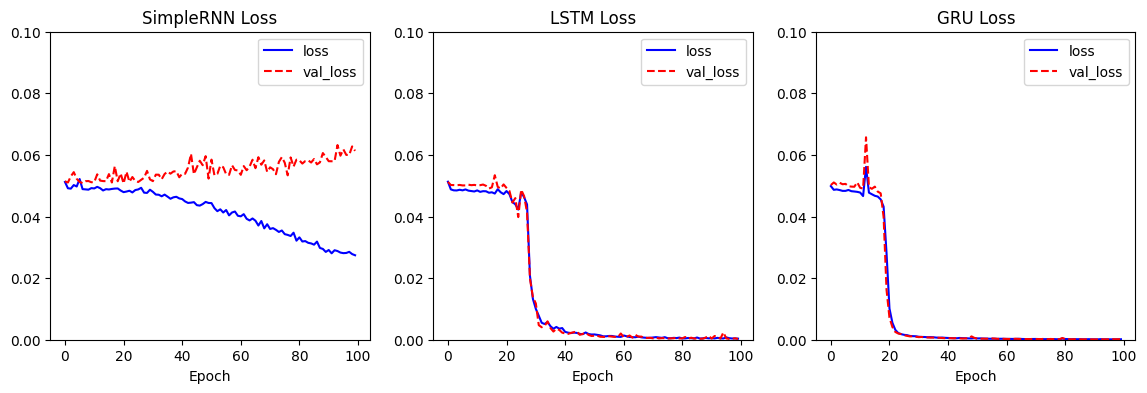

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(history_simplernn.history["loss"], "b-", label="loss")
plt.plot(history_simplernn.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.title("SimpleRNN Loss")
plt.ylim(0,0.1)
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_lstm.history["loss"], "b-", label="loss")
plt.plot(history_lstm.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.title("LSTM Loss")
plt.ylim(0,0.1)
plt.legend()

plt.subplot(1,3,3)
plt.plot(history_gru.history["loss"], "b-", label="loss")
plt.plot(history_gru.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.title("GRU Loss")
plt.ylim(0,0.1)
plt.legend()

plt.show()

In [65]:
model_simplernn.evaluate(X[2560:], Y[2560:])
model_lstm.evaluate(X[2560:], Y[2560:])
model_gru.evaluate(X[2560:], Y[2560:])

14/14 [==============================] - 0s 5ms/step - loss: 1.8618e-04


0.00018618190370034426

## 

<h2> 4. Embedding Layer  </h2>
<ul>
    <li> 개념 : 자연어를 수치화된 정보로 바꾸기 위한 레이어 </li>
    <li> 특징 : 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 데이터로 자연어 역시 분리할 수 있음 </li>
    <li> 특징 : 영어는 문자, 한글은 문자와 자소등으로 분리가 가능하며 n-gram, Stopword 방식 등을 활용 </li>
    <li> 차이 : One-HOT Encoding 방식은 메모리양에 비해 너무 적은 정보량을 표현하나 임베딩 방식은 그렇지 않음 </li>
    <li> flow : 단어 -> 인덱싱 -> 원핫인코딩 -> 임베딩레이어 -> 단어 임베딩 </li>
    <li> Usage : tf.keras.layers.Embedding</li>
</ul>
<br>
<table align=left>
    <tr>
        <th> Word </th>
        <th> Index </th>
        <th> One-Hot Encoding </th>
        <th> Embedding </th>
    </tr>
    <tr>
        <td> this </td>
        <td> 0 </td>
        <td> [1,0,0,0,0]</td>
        <td> [0.1,0.4,0.4,0.0,0.1]</td>
    </tr>
     <tr>
        <td> is </td>
        <td> 1 </td>
        <td> [0,1,0,0,0]</td>
        <td> [0.1,0.2,0.8,0.0,0.1]</td>
    </tr>
     <tr>
        <td> a </td>
        <td> 2 </td>
        <td> [0,0,1,0,0]</td>
        <td> [0.2,0.5,0.0,0.6,0.3]</td>
    </tr>
     <tr>
        <td> big </td>
        <td> 3</td>
        <td> [0,0,0,1,0]</td>
        <td> [0.8,0.2,0.4,0.8,0.8]</td>
    </tr>
    <tr>
        <td> cat </td>
        <td> 4</td>
        <td> [0,0,0,0,1]</td>
        <td> [0.4,0.2,0.6,0.9,0.9]</td>
    </tr>
</table>